# PROYECTO EMD629

En el presente notebook se presenta un Conjunto de datos de Evaluaciones de Cliente Oculto realizadas por una Consultora de Marketing.

El Data Source tiene definidas las siguientes columnas:
IdEvaluacion, Cliente, Canal, Pais, Ubicacion, FechaEvaluacion, EstadoEvaluacion, Nota, Costo, Cobro, Direccion, TipoUbicacion, Horario, CategoriaNota, SatisfaccionCliente, TratoCliente, TiempoAtencion, EsFechaFeriado, IdCliente, IdCanal, IdUbicacion


## Declaración de Librerías y Carga de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f, mannwhitneyu, wilcoxon, kruskal, friedmanchisquare
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm
from statistics import mode

In [2]:
# Lectura de archivo 
df = pd.read_csv('EMD629.csv')

In [3]:
# Vista preliminar de dataframe
df.head()

,IdEvaluacion,Cliente,Canal,Pais,Ubicacion,FechaEvaluacion,EstadoEvaluacion,Nota,Costo,Cobro,...,TipoUbicacion,Horario,CategoriaNota,SatisfaccionCliente,TratoCliente,TiempoAtencion,EsFechaFeriado,IdCliente,IdCanal,IdUbicacion
0,45925,Davivienda,Agencia,Colombia,Calle Las Acacias,2024-03-20,Completado,65.980198,57.356,102.09368,...,Filial,Diurno,Buena,Baja,Neutro,Moderado,No,10,21,15
1,45926,Davivienda,Agencia,Colombia,Calle Las Acacias,2024-07-24,Completado,84.306930,60.665,161.97555,...,Filial,Diurno,Muy Buena,Media,Neutro,Moderado,No,10,21,15
2,45927,Davivienda,Agencia,Colombia,Calle Las Acacias,2024-10-20,Completado,80.841584,49.635,132.52545,...,Filial,Diurno,Muy Buena,Alta,Amable,Moderado,No,10,21,15
3,45928,Davivienda,Agencia,Colombia,Calle Las Acacias,2025-02-02,Completado,68.990099,54.047,144.30549,...,Filial,Nocturno,Buena,Baja,Neutro,Rapido,No,10,21,15
4,45930,Davivienda,Agencia,Colombia,Calle Las Acacias,2025-05-19,Completado,79.277227,40.811,108.96537,...,Filial,Diurno,Muy Buena,Alta,Amable,Moderado,No,10,21,15


## Clasificación y Tipos de Variables

In [4]:
# Corroborar tipo de datos
df.dtypes

IdEvaluacion             int64
Cliente                 object
Canal                   object
Pais                    object
Ubicacion               object
FechaEvaluacion         object
EstadoEvaluacion        object
Nota                   float64
Costo                  float64
Cobro                  float64
Direccion               object
TipoUbicacion           object
Horario                 object
CategoriaNota           object
SatisfaccionCliente     object
TratoCliente            object
TiempoAtencion          object
EsFechaFeriado          object
IdCliente                int64
IdCanal                  int64
IdUbicacion              int64
dtype: object

In [5]:
# Conversión de tipo de dato para variable FechaEvaluacion
df['FechaEvaluacion'] = pd.to_datetime(df['FechaEvaluacion'])

In [6]:
# Conversión de tipo de dato para variables categóricas
var_categoria = ['IdEvaluacion','Cliente','Canal','Pais','Ubicacion','EstadoEvaluacion','Direccion','TipoUbicacion','Horario','CategoriaNota','SatisfaccionCliente','TratoCliente','TiempoAtencion','EsFechaFeriado','IdCliente','IdCanal','IdUbicacion']
df[var_categoria] = df[var_categoria].astype('category')

In [7]:
# Corroborar tipo de datos
df.dtypes

IdEvaluacion                 category
Cliente                      category
Canal                        category
Pais                         category
Ubicacion                    category
FechaEvaluacion        datetime64[ns]
EstadoEvaluacion             category
Nota                          float64
Costo                         float64
Cobro                         float64
Direccion                    category
TipoUbicacion                category
Horario                      category
CategoriaNota                category
SatisfaccionCliente          category
TratoCliente                 category
TiempoAtencion               category
EsFechaFeriado               category
IdCliente                    category
IdCanal                      category
IdUbicacion                  category
dtype: object

## Evaluación de Calidad de Datos

In [8]:
# Valores nulos
# Calcular cantidad y porcentaje de nulos
nulos = df.isnull().sum()
porcentaje = (df.isnull().sum() / len(df)) * 100

# Combinar en un solo DataFrame
resultado = pd.DataFrame({
    'Cantidad de Nulos': nulos,
    'Porcentaje de Nulos (%)': porcentaje.round(2)
})

print(resultado)

                     Cantidad de Nulos  Porcentaje de Nulos (%)
IdEvaluacion                         0                     0.00
Cliente                              0                     0.00
Canal                                0                     0.00
Pais                                 0                     0.00
Ubicacion                            0                     0.00
FechaEvaluacion                      0                     0.00
EstadoEvaluacion                     0                     0.00
Nota                                35                     0.10
Costo                               16                     0.04
Cobro                               22                     0.06
Direccion                            0                     0.00
TipoUbicacion                        0                     0.00
Horario                              0                     0.00
CategoriaNota                        0                     0.00
SatisfaccionCliente                  0  

In [9]:
# Valores Negativos e Inválidos
negativosCostos = (df['Costo'] < 0).sum()
negativosCobros = (df['Cobro'] < 0).sum()
invalidaNotas = ((df['Nota'] < 0) | (df['Nota'] > 100)).sum()

pnegativosCostos = ((df['Costo'] < 0).sum() / len(df)) * 100
pnegativosCobros = ((df['Cobro'] < 0).sum() / len(df)) * 100
pinvalidaNotas = (((df['Nota'] < 0) | (df['Nota'] > 100)).sum() / len(df)) * 100

print(f"Cantidad de valores negativos a imputar para Costos: {negativosCostos}")
print(f"Porcentaje de valores negativos a imputar para Costos: {pnegativosCostos.round(2)}%")
print(f"Cantidad de valores negativos a imputar para Cobros: {negativosCobros}")
print(f"Porcentaje de valores negativos a imputar para Cobros: {pnegativosCobros.round(2)}%")
print(f"Cantidad de valores invalidos a imputar para Notas: {invalidaNotas}")
print(f"Porcentaje de valores inválidos a imputar para Notas: {pinvalidaNotas.round(2)}%")



Cantidad de valores negativos a imputar para Costos: 11
Porcentaje de valores negativos a imputar para Costos: 0.03%
Cantidad de valores negativos a imputar para Cobros: 16
Porcentaje de valores negativos a imputar para Cobros: 0.04%
Cantidad de valores invalidos a imputar para Notas: 38
Porcentaje de valores inválidos a imputar para Notas: 0.11%


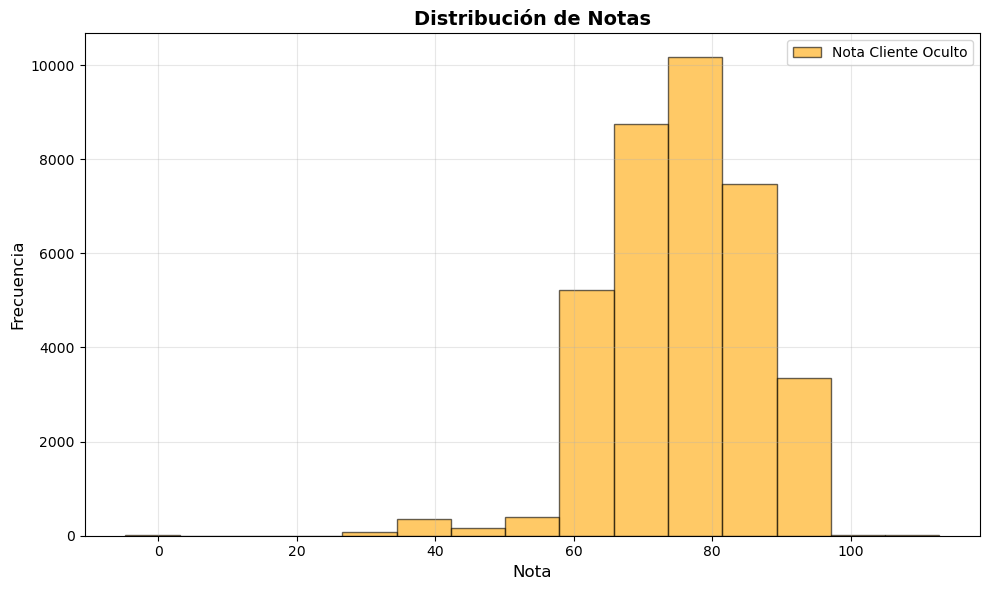


Estadísticas Descriptivas:
Notas de Cliente - Media: 75.62, Desv. Est.: 10.65


In [10]:
# Gráficas de Distribucion para Nota, Cobro, Costo
plt.figure(figsize=(10, 6))
plt.hist(df['Nota'], bins=15, alpha=0.6, label='Nota Cliente Oculto', color='orange', edgecolor='black')
plt.xlabel('Nota', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Notas', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print(f"\nEstadísticas Descriptivas:")
print(f"Notas de Cliente - Media: {df['Nota'].mean():.2f}, Desv. Est.: {df['Nota'].std():.2f}")

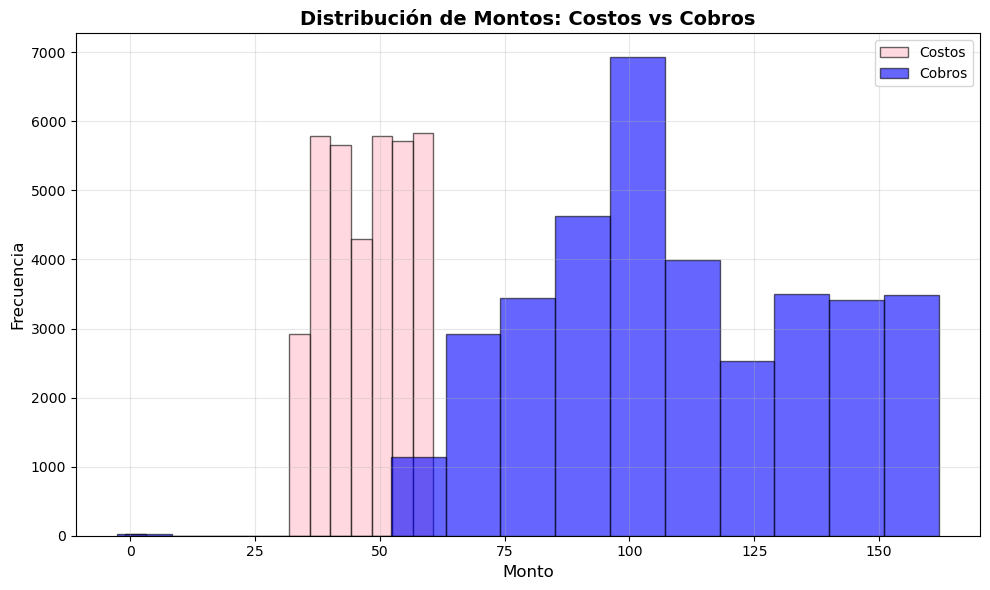


Estadísticas Descriptivas:
Costos - Media: 47.42, Desv. Est.: 8.06
Cobros - Media: 109.63, Desv. Est.: 28.11


In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['Costo'], bins=15, alpha=0.6, label='Costos', color='pink', edgecolor='black')
plt.hist(df['Cobro'], bins=15, alpha=0.6, label='Cobros', color='blue', edgecolor='black')
plt.xlabel('Monto', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Montos: Costos vs Cobros', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nEstadísticas Descriptivas:")
print(f"Costos - Media: {df['Costo'].mean():.2f}, Desv. Est.: {df['Costo'].std():.2f}")
print(f"Cobros - Media: {df['Cobro'].mean():.2f}, Desv. Est.: {df['Cobro'].std():.2f}")

In [12]:
# Imputación de Nota y Costo la media y Cobro asignando la mediana
df['Nota'] = df['Nota'].fillna(df['Nota'].median()) # Debido al sesgo de distribución a la izq negativa asimétrica
df['Costo'] = df['Costo'].fillna(df['Costo'].mean()) # Distribución normal/gaussiana
df['Cobro'] = df['Cobro'].fillna(df['Cobro'].median()) # Debido al sesgo de distribución a la derecha positiva asimétrica

In [13]:
# Imputación de Nota y Costos/Cobros fuera de Rango
# Notas deben estar entre 0 a 100
# Cobros y Costos deben ser mayores o iguales que cero

media_valida = df.loc[(df['Nota'] >= 0) & (df['Nota'] <= 100), 'Nota'].mean()
df.loc[(df['Nota'] < 0) | (df['Nota'] > 100), 'Nota'] = media_valida

promedio_costo = df.loc[df['Costo'] >= 0, 'Costo'].mean()
df.loc[df['Costo'] < 0, 'Costo'] = promedio_costo

promedio_cobro = df.loc[df['Cobro'] >= 0, 'Cobro'].median()
df.loc[df['Cobro'] < 0, 'Cobro'] = promedio_cobro

## Identificación de Atípicos

In [16]:
# Agrupación por Percentiles para Notas

dfNota = df[['Nota']].copy()
dfNota['grupo_percentil'] = pd.qcut(dfNota['Nota'], q=5, labels=['Muy Bajo','Bajo', 'Medio', 'Alto','Muy Alto'])
print("Notas Agrupados por Percentiles:")
print(dfNota.sort_values('Nota'))

print("\nDistribución por Percentil:")
print(dfNota['grupo_percentil'].value_counts().sort_index())

percentiles = dfNota['Nota'].quantile([0,0.2,0.4,0.6, 0.8, 1.0])
print("\nLímites de los Grupos:")
print(f"Muy Bajo: hasta {percentiles.iloc[1]:.2f}")
print(f"Bajo: {percentiles.iloc[1]:.2f} - {percentiles.iloc[2]:.2f}")
print(f"Medio: {percentiles.iloc[2]:.2f} - {percentiles.iloc[3]:.2f}")
print(f"Alto: {percentiles.iloc[3]:.2f} - {percentiles.iloc[4]:.2f}")
print(f"Muy Alto: más de {percentiles.iloc[4]:.2f}")


Notas Agrupados por Percentiles:
            Nota grupo_percentil
7188   30.006600        Muy Bajo
36000  30.056105        Muy Bajo
3656   30.059406        Muy Bajo
327    30.082508        Muy Bajo
32414  30.099010        Muy Bajo
...          ...             ...
23810  97.841584        Muy Alto
32374  97.861386        Muy Alto
2972   97.881188        Muy Alto
17390  97.920792        Muy Alto
24681  97.980198        Muy Alto

[36017 rows x 2 columns]

Distribución por Percentil:
grupo_percentil
Muy Bajo    7209
Bajo        7209
Medio       7195
Alto        7203
Muy Alto    7201
Name: count, dtype: int64

Límites de los Grupos:
Muy Bajo: hasta 66.80
Bajo: 66.80 - 73.20
Medio: 73.20 - 78.66
Alto: 78.66 - 84.56
Muy Alto: más de 84.56


In [19]:
# Agrupación por Percentiles para Costos

dfCosto = df[['Costo']].copy()
dfCosto['grupo_percentil'] = pd.qcut(dfCosto['Costo'], q=7, labels=['Muy Bajo', 'Bajo', 'Bajo-Medio','Medio','Alto-Medio','Alto','Muy Alto'])
print("Costos Agrupados por Percentiles:")
print(dfCosto.sort_values('Costo'))

print("\nDistribución por Percentil:")
print(dfCosto['grupo_percentil'].value_counts().sort_index())

percentiles = dfCosto['Costo'].quantile([0, 0.167,0.333,0.5, 0.667,0.833, 1.0])
print("\nLímites de los Grupos:")
print(f"Muy Bajo: hasta ${percentiles.iloc[1]:.2f}")
print(f"Bajo: ${percentiles.iloc[1]:.2f} - ${percentiles.iloc[2]:.2f}")
print(f"Bajo-Medio: ${percentiles.iloc[2]:.2f} - ${percentiles.iloc[3]:.2f}")
print(f"Medio: ${percentiles.iloc[3]:.2f} - ${percentiles.iloc[4]:.2f}")
print(f"Alto-Medio: ${percentiles.iloc[4]:.2f} - ${percentiles.iloc[5]:.2f}")
print(f"Alto: ${percentiles.iloc[5]:.2f} - ${percentiles.iloc[6]:.2f}")
print(f"Muy Alto: más de ${percentiles.iloc[6]:.2f}")

Costos Agrupados por Percentiles:
        Costo grupo_percentil
26759   0.000        Muy Bajo
26219   0.000        Muy Bajo
27668   0.000        Muy Bajo
4892    0.000        Muy Bajo
17202   0.000        Muy Bajo
...       ...             ...
28695  60.665        Muy Alto
36014  60.665        Muy Alto
28688  60.665        Muy Alto
9416   60.665        Muy Alto
28734  60.665        Muy Alto

[36017 rows x 2 columns]

Distribución por Percentil:
grupo_percentil
Muy Bajo      5800
Bajo          5782
Bajo-Medio    4206
Medio         5796
Alto-Medio    4281
Alto          5770
Muy Alto      4382
Name: count, dtype: int64

Límites de los Grupos:
Muy Bajo: hasta $38.60
Bajo: $38.60 - $43.02
Bajo-Medio: $43.02 - $47.43
Medio: $47.43 - $51.84
Alto-Medio: $51.84 - $56.25
Alto: $56.25 - $60.66
Muy Alto: más de $60.66


In [56]:
# Agrupación por Percentiles para Cobro

dfCobro = df[['Cobro']].copy()
dfCobro['grupo_percentil'] = pd.qcut(dfCobro['Cobro'], q=3, labels=['Bajo', 'Medio', 'Alto'])
print("Costos Agrupados por Percentiles:")
print(dfCobro.sort_values('Cobro'))

print("\nDistribución por Percentil:")
print(dfCobro['grupo_percentil'].value_counts().sort_index())

percentiles = dfCobro['Cobro'].quantile([0, 0.333, 0.667, 1.0])
print("\nLímites de los Grupos:")
print(f"Bajo: hasta ${percentiles.iloc[1]:.2f}")
print(f"Medio: ${percentiles.iloc[1]:.2f} - ${percentiles.iloc[2]:.2f}")
print(f"Alto: más de ${percentiles.iloc[2]:.2f}")

Costos Agrupados por Percentiles:
           Cobro grupo_percentil
27668    0.00000            Bajo
4892     0.00000            Bajo
32043    0.00000            Bajo
33048    0.00000            Bajo
11339    0.00000            Bajo
...          ...             ...
11630  161.97555            Alto
9716   161.97555            Alto
4365   161.97555            Alto
30000  161.97555            Alto
10650  161.97555            Alto

[36017 rows x 2 columns]

Distribución por Percentil:
grupo_percentil
Bajo     12142
Medio    12612
Alto     11263
Name: count, dtype: int64

Límites de los Grupos:
Bajo: hasta $94.24
Medio: $94.24 - $123.69
Alto: más de $123.69


## Medidas de Tendencia Central

In [21]:
# Medidas de Tendencia Central en Variables Cuantitativas (Numéricas)
medidas_cuantitativas = df[['Nota', 'Costo', 'Cobro']].describe().T
moda = df[['Nota', 'Costo', 'Cobro']].mode().iloc[0]  
medidas_cuantitativas['mode'] = moda

medidas_cuantitativas

,count,mean,std,min,25%,50%,75%,max,mode
Nota,36017.0,75.636239,10.478776,30.0066,68.594059,75.960396,82.940594,97.980198,75.970297
Costo,36017.0,47.431323,8.011055,0.0000,40.811000,47.429000,54.047000,60.665000,60.665000
Cobro,36017.0,109.670967,27.999745,0.0000,90.313640,106.020360,132.525450,161.975550,94.240320


In [23]:
# Medidas de Tendencia Central en Variables Cualitativas (Categóricas)
medidas_cualitativas = df[['IdEvaluacion','Cliente','Canal','Pais','Ubicacion','EstadoEvaluacion','Direccion','TipoUbicacion','Horario','CategoriaNota','SatisfaccionCliente','TratoCliente','TiempoAtencion','EsFechaFeriado','IdCliente','IdCanal','IdUbicacion']].describe().T
moda = df[['IdEvaluacion','Cliente','Canal','Pais','Ubicacion','EstadoEvaluacion','Direccion','TipoUbicacion','Horario','CategoriaNota','SatisfaccionCliente','TratoCliente','TiempoAtencion','EsFechaFeriado','IdCliente','IdCanal','IdUbicacion']].mode().iloc[0]  
medidas_cualitativas['mode'] = moda

medidas_cualitativas

,count,unique,top,freq,mode
IdEvaluacion,36017,36017,23051,1,23051
Cliente,36017,10,McDonalds,14672,McDonalds
Canal,36017,12,Sucursal,8124,Sucursal
Pais,36017,6,Colombia,9186,Colombia
Ubicacion,36017,288,Centro Comercial Multiplaza,668,Centro Comercial Multiplaza
EstadoEvaluacion,36017,3,Completado,35845,Completado
Direccion,36017,412,"12 Calle Poniente, Plaza Monte Bello",380,"100 Carretera Sur, Callejón Los Nogales"
TipoUbicacion,36017,6,Restaurante,19557,Restaurante
Horario,36017,4,Diurno,15139,Diurno
CategoriaNota,36017,6,Muy Buena,15844,Muy Buena


In [24]:
# Agrupacion genérica
df.groupby(['Cliente']).count()

C:\Users\uadmin\AppData\Local\Temp\ipykernel_8232\3260997959.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Cliente']).count()


,IdEvaluacion,Canal,Pais,Ubicacion,FechaEvaluacion,EstadoEvaluacion,Nota,Costo,Cobro,Direccion,TipoUbicacion,Horario,CategoriaNota,SatisfaccionCliente,TratoCliente,TiempoAtencion,EsFechaFeriado,IdCliente,IdCanal,IdUbicacion
Cliente,,,,,,,,,,,,,,,,,,,,
Davivienda,460,460,460,460,460,460,460,460,460,460,460,460,460,460,460,460,460,460,460,460
DollarCity,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480
Dominos Pizza,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321
Home Depot,294,294,294,294,294,294,294,294,294,294,294,294,294,294,294,294,294,294,294,294
McDonalds,14672,14672,14672,14672,14672,14672,14672,14672,14672,14672,14672,14672,14672,14672,14672,14672,14672,14672,14672,14672
Movistar,5100,5100,5100,5100,5100,5100,5100,5100,5100,5100,5100,5100,5100,5100,5100,5100,5100,5100,5100,5100
Pricesmart,6150,6150,6150,6150,6150,6150,6150,6150,6150,6150,6150,6150,6150,6150,6150,6150,6150,6150,6150,6150
Subway,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564
Tiendas Adidas,1260,1260,1260,1260,1260,1260,1260,1260,1260,1260,1260,1260,1260,1260,1260,1260,1260,1260,1260,1260


In [25]:
# Agrupacion genérica
df.groupby(['Pais']).count()

C:\Users\uadmin\AppData\Local\Temp\ipykernel_8232\4178106772.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Pais']).count()


,IdEvaluacion,Cliente,Canal,Ubicacion,FechaEvaluacion,EstadoEvaluacion,Nota,Costo,Cobro,Direccion,TipoUbicacion,Horario,CategoriaNota,SatisfaccionCliente,TratoCliente,TiempoAtencion,EsFechaFeriado,IdCliente,IdCanal,IdUbicacion
Pais,,,,,,,,,,,,,,,,,,,,
Colombia,9186,9186,9186,9186,9186,9186,9186,9186,9186,9186,9186,9186,9186,9186,9186,9186,9186,9186,9186,9186
El Salvador,6376,6376,6376,6376,6376,6376,6376,6376,6376,6376,6376,6376,6376,6376,6376,6376,6376,6376,6376,6376
Guatemala,8040,8040,8040,8040,8040,8040,8040,8040,8040,8040,8040,8040,8040,8040,8040,8040,8040,8040,8040,8040
Honduras,2772,2772,2772,2772,2772,2772,2772,2772,2772,2772,2772,2772,2772,2772,2772,2772,2772,2772,2772,2772
Mexico,7596,7596,7596,7596,7596,7596,7596,7596,7596,7596,7596,7596,7596,7596,7596,7596,7596,7596,7596,7596
Panama,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047


In [26]:
# Agrupacion genérica
df.groupby(['EstadoEvaluacion']).count()

C:\Users\uadmin\AppData\Local\Temp\ipykernel_8232\3750395233.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['EstadoEvaluacion']).count()


,IdEvaluacion,Cliente,Canal,Pais,Ubicacion,FechaEvaluacion,Nota,Costo,Cobro,Direccion,TipoUbicacion,Horario,CategoriaNota,SatisfaccionCliente,TratoCliente,TiempoAtencion,EsFechaFeriado,IdCliente,IdCanal,IdUbicacion
EstadoEvaluacion,,,,,,,,,,,,,,,,,,,,
Cancelado,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
Completado,35845,35845,35845,35845,35845,35845,35845,35845,35845,35845,35845,35845,35845,35845,35845,35845,35845,35845,35845,35845
Pendiente,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92


In [27]:
# Agrupacion genérica
df.groupby(['TiempoAtencion']).count()

C:\Users\uadmin\AppData\Local\Temp\ipykernel_8232\76852879.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['TiempoAtencion']).count()


,IdEvaluacion,Cliente,Canal,Pais,Ubicacion,FechaEvaluacion,EstadoEvaluacion,Nota,Costo,Cobro,Direccion,TipoUbicacion,Horario,CategoriaNota,SatisfaccionCliente,TratoCliente,EsFechaFeriado,IdCliente,IdCanal,IdUbicacion
TiempoAtencion,,,,,,,,,,,,,,,,,,,,
Lento,7893,7893,7893,7893,7893,7893,7893,7893,7893,7893,7893,7893,7893,7893,7893,7893,7893,7893,7893,7893
Moderado,16083,16083,16083,16083,16083,16083,16083,16083,16083,16083,16083,16083,16083,16083,16083,16083,16083,16083,16083,16083
Rapido,12041,12041,12041,12041,12041,12041,12041,12041,12041,12041,12041,12041,12041,12041,12041,12041,12041,12041,12041,12041


## Análisis Gráficos

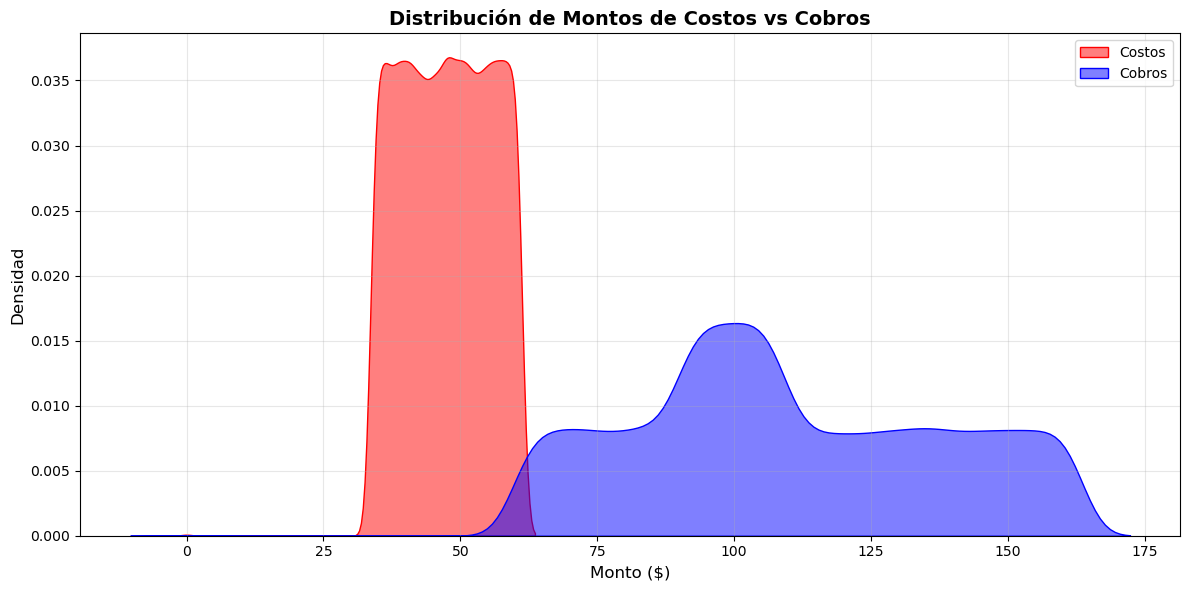


Estadísticas Descriptivas:
Cobros - Media: $47.4313, Mediana: $47.4290
Costos - Media: $109.6710, Mediana: $106.0204


In [28]:
# Comparación de Costos vs Cobros - KDE

Costos = df['Costo'] #df[['Costo']].copy()
Cobros = df['Cobro'] #df[['Cobro']].copy()

plt.figure(figsize=(12, 6))
sns.kdeplot(Costos, label='Costos', fill=True, alpha=0.5, color='red')
sns.kdeplot(Cobros, label='Cobros', fill=True, alpha=0.5, color='blue')
plt.xlabel('Monto ($)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.title('Distribución de Montos de Costos vs Cobros', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nEstadísticas Descriptivas:")
print(f"Cobros - Media: ${Costos.mean():.4f}, Mediana: ${np.median(Costos):.4f}")
print(f"Costos - Media: ${Cobros.mean():.4f}, Mediana: ${np.median(Cobros):.4f}")

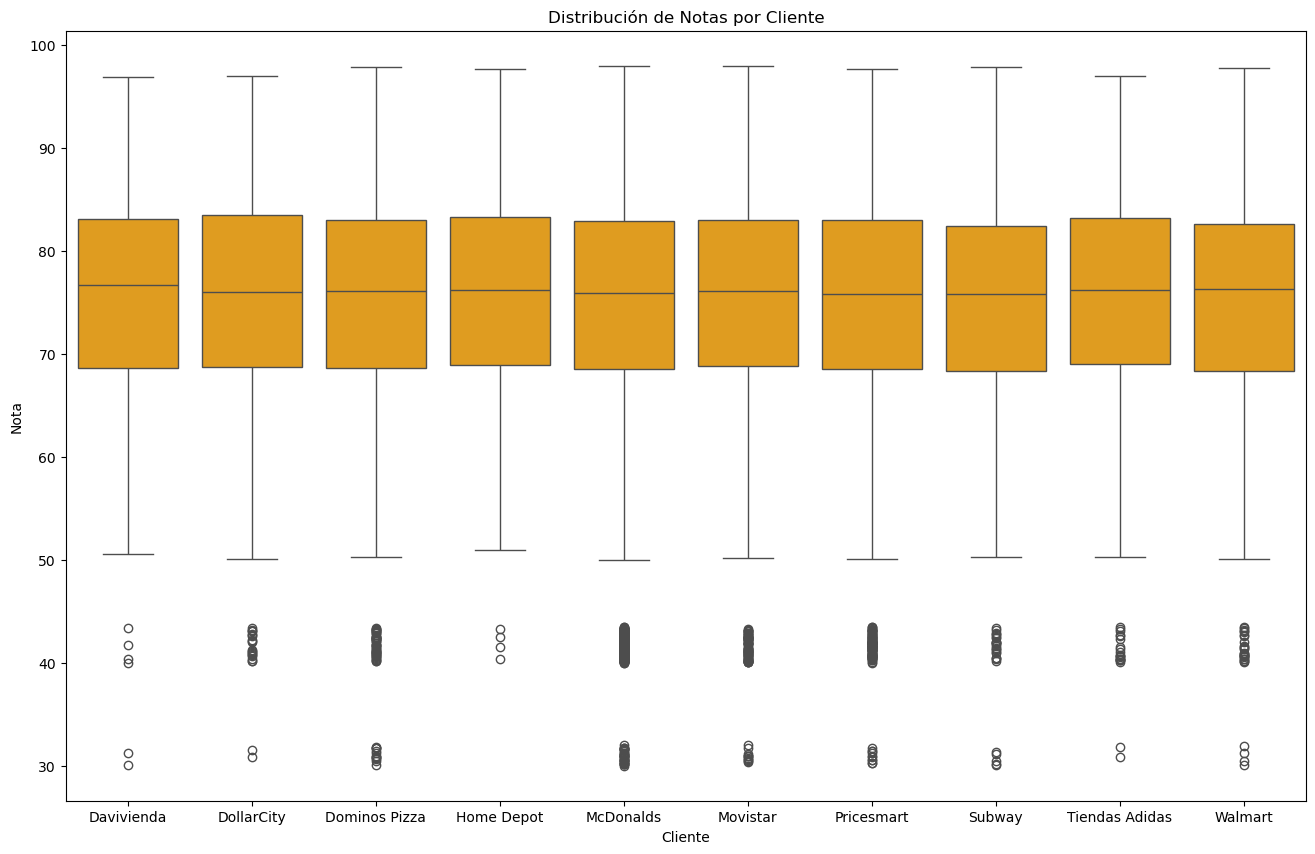

In [29]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df, x='Cliente', y='Nota', color='orange')

plt.title('Distribución de Notas por Cliente')
plt.xlabel('Cliente')
plt.ylabel('Nota')
plt.show()

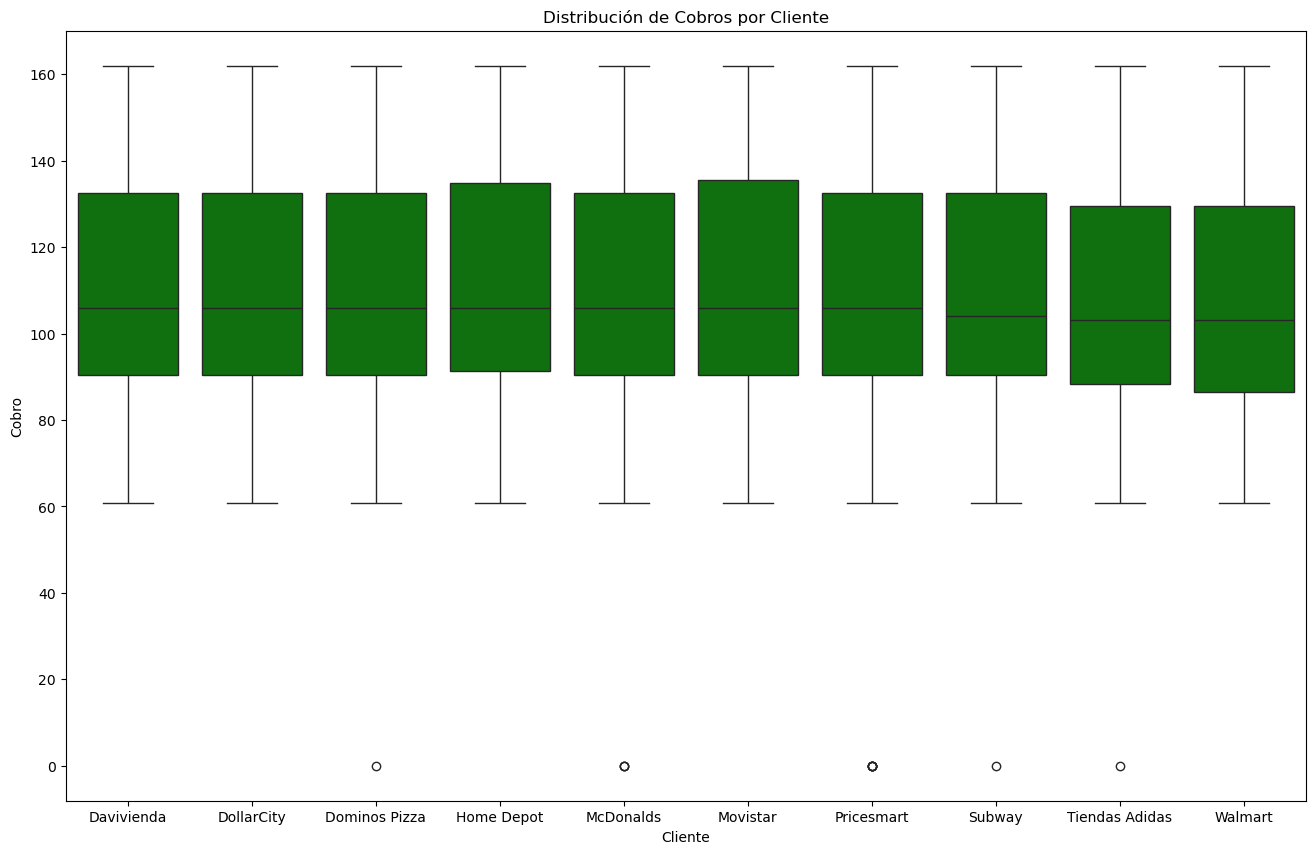

In [30]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df, x='Cliente', y='Cobro', color='green')

plt.title('Distribución de Cobros por Cliente')
plt.xlabel('Cliente')
plt.ylabel('Cobro')
plt.show()

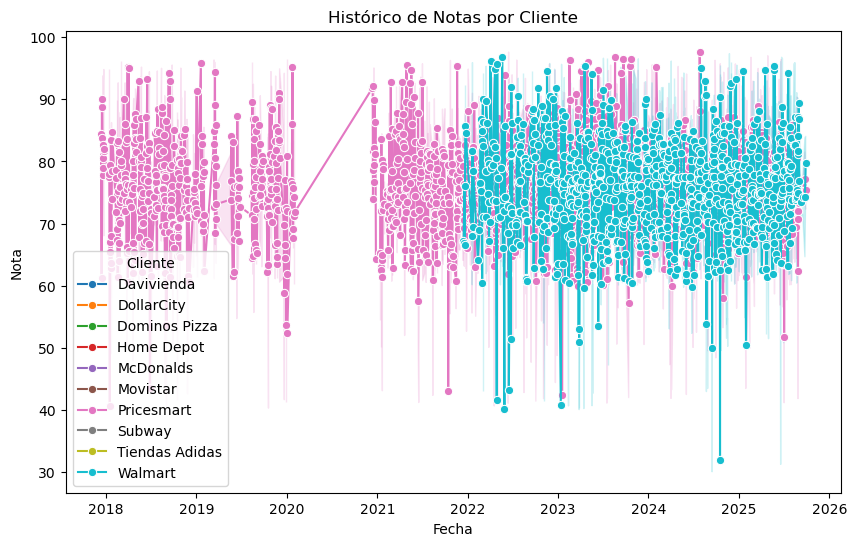

In [31]:
# Histórico de notas por cliente
plt.figure(figsize=(10,6))
sns.lineplot(data=df[df['Cliente'].isin(['Pricesmart', 'Walmart'])], x='FechaEvaluacion', y='Nota', hue='Cliente', marker='o')
plt.title('Histórico de Notas por Cliente')
plt.xlabel('Fecha')
plt.ylabel('Nota')
plt.legend(title='Cliente')
plt.show()

In [32]:
#Revenue (Ganancia neta)
df['Revenue'] = df['Cobro'] - df['Costo']

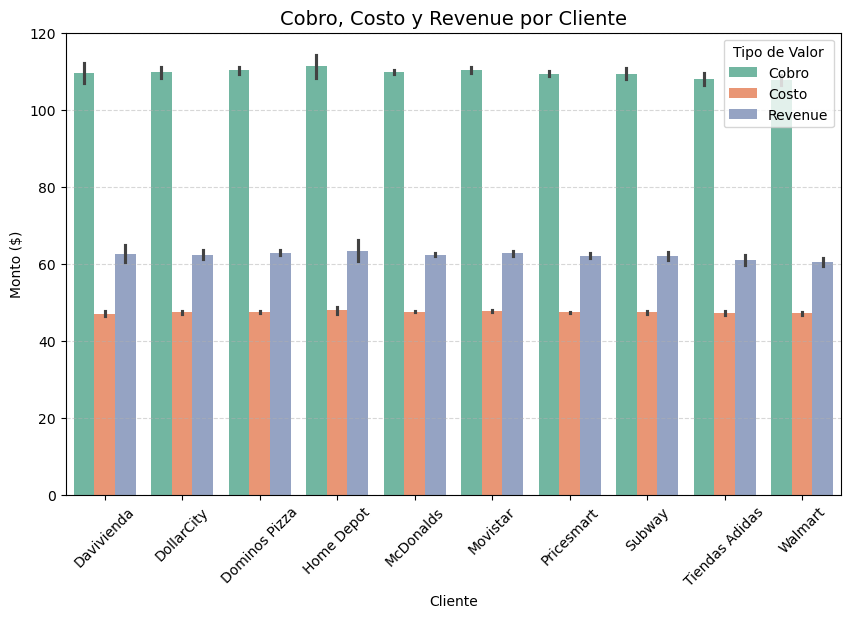

In [33]:
# Valores de Cobro, Costo y Revenue
df_melted = df.melt(id_vars='Cliente', value_vars=['Cobro', 'Costo', 'Revenue'], var_name='Tipo', value_name='Valor')

plt.figure(figsize=(10,6))
sns.barplot(data=df_melted, x='Cliente', y='Valor', hue='Tipo', palette='Set2')

plt.title('Cobro, Costo y Revenue por Cliente', fontsize=14)
plt.xlabel('Cliente')
plt.ylabel('Monto ($)')
plt.legend(title='Tipo de Valor')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#df_melted.describe().T

In [49]:
# Ordenamiento por fecha
df = df.sort_values('FechaEvaluacion')

# Calcular los acumulados
df['CostoAcum'] = df['Costo'].cumsum()
df['CobroAcum'] = df['Cobro'].cumsum()
df['RevenueAcum'] = df['Revenue'].cumsum()

# Columna MesAnio
df['MesAnio'] = df['FechaEvaluacion'].dt.to_period('M')
df_mensual = df.groupby('MesAnio')[['Costo', 'Cobro', 'Revenue']].sum().reset_index()

# Convertir el periodo a timestamp para graficar
df_mensual['MesAnio'] = df_mensual['MesAnio'].dt.to_timestamp()

# Periodo semestral
df['Anio'] = df['FechaEvaluacion'].dt.year
df['Semestre'] = df['FechaEvaluacion'].dt.month.map(lambda m: 1 if m <= 6 else 2)
df['Periodo'] = df['Anio'].astype(str) + 'S' + df['Semestre'].astype(str)

# Agrupación por el periodo semestral
df_semestral = df.groupby('Periodo')[['Costo', 'Cobro', 'Revenue']].sum().reset_index()
df_semestral['Orden'] = df_semestral['Periodo'].str.extract(r'(\d+)S(\d+)').apply(
    lambda x: int(x[0]) * 10 + int(x[1]), axis=1
)
df_semestral = df_semestral.sort_values('Orden')

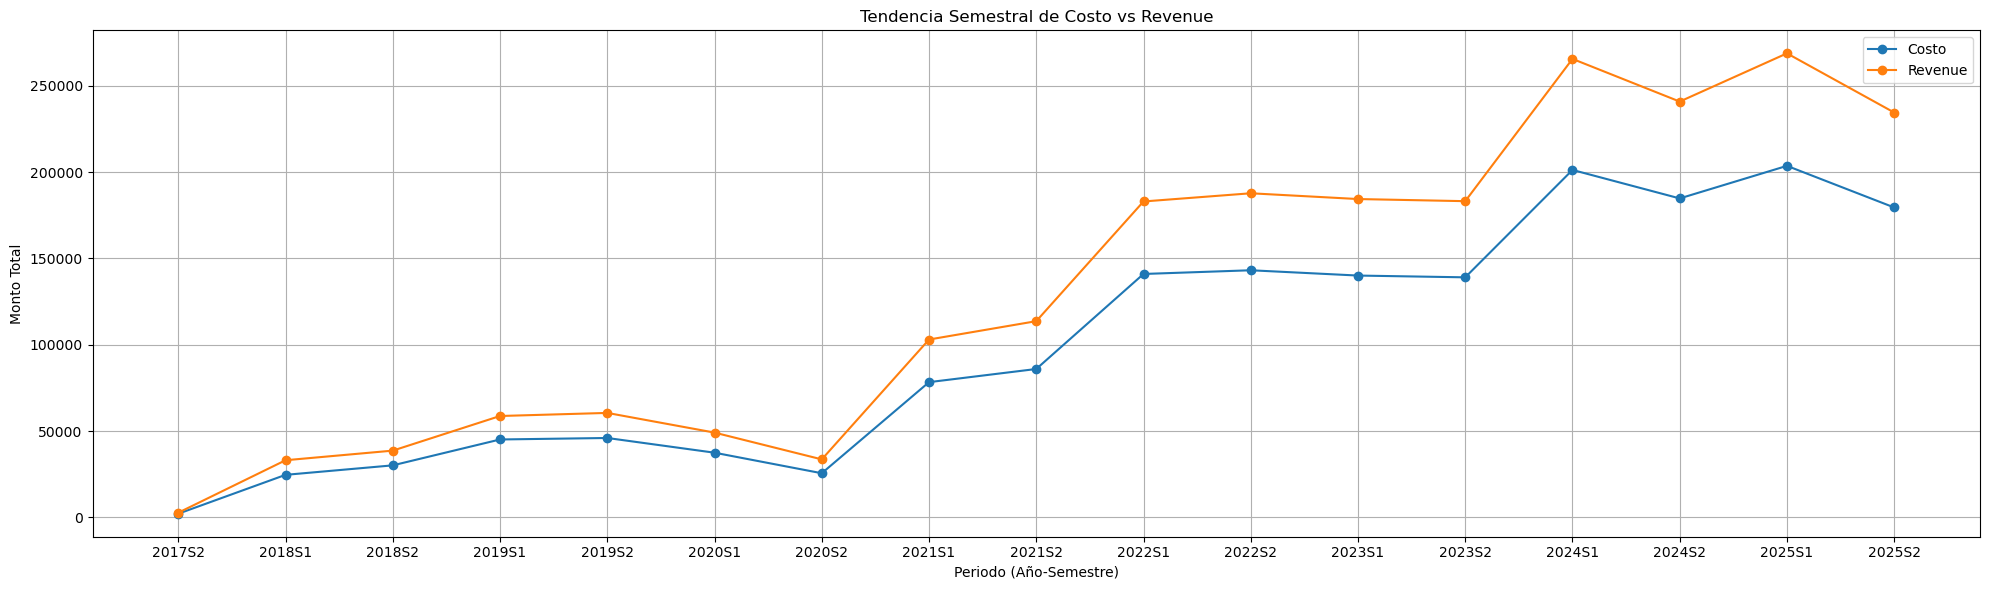

In [55]:
# --- Gráfico de líneas ---
plt.figure(figsize=(20, 6))
plt.plot(df_semestral['Periodo'], df_semestral['Costo'], marker='o', label='Costo')
#plt.plot(df_semestral['Periodo'], df_semestral['Cobro'], marker='o', label='Cobro')
plt.plot(df_semestral['Periodo'], df_semestral['Revenue'], marker='o', label='Revenue')

# --- Estilo del gráfico ---
plt.title('Tendencia Semestral de Costo vs Revenue')
plt.xlabel('Periodo (Año-Semestre)')
plt.ylabel('Monto Total')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Medidas de Variabilidad y Posición

In [36]:
# Desviación Estándar y Promedio para Nota, Costo y Cobro de Evaluaciones Agrupado por País
df.groupby(['Pais'],as_index=False ).agg(
    promedio_Notas = ('Nota','mean'),
    std_Notas = ('Nota','std'),
    promedio_Costo = ('Costo','mean'),
    std_Costo = ('Costo','std'),
    promedio_Cobro = ('Cobro','mean'),
    std_Cobro = ('Cobro','std')
)


C:\Users\uadmin\AppData\Local\Temp\ipykernel_8232\2108236116.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Pais'],as_index=False ).agg(


,Pais,promedio_Notas,std_Notas,promedio_Costo,std_Costo,promedio_Cobro,std_Cobro
0,Colombia,75.711159,10.465336,47.385650,8.069533,109.709157,28.067689
1,El Salvador,75.401117,10.564740,47.349593,8.009269,109.020489,27.750861
2,Guatemala,75.751875,10.430472,47.428721,7.999116,109.828849,28.066839
3,Honduras,75.626217,10.467514,47.659380,7.957215,110.340841,28.264171
4,Mexico,75.625268,10.447425,47.475170,7.996374,109.709118,27.973949
5,Panama,75.632483,10.591172,47.429533,7.929774,109.856882,27.935503


In [35]:
# Desviación Estándar y Promedio para Nota, Costo y Cobro de Evaluaciones Agrupado por Cliente
df.groupby(['Cliente'],as_index=False ).agg(
    promedio_Notas = ('Nota','mean'),
    std_Notas = ('Nota','std'),
    promedio_Costo = ('Costo','mean'),
    std_Costo = ('Costo','std'),
    promedio_Cobro = ('Cobro','mean'),
    std_Cobro = ('Cobro','std')
)

C:\Users\uadmin\AppData\Local\Temp\ipykernel_8232\3563552039.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Cliente'],as_index=False ).agg(


,Cliente,promedio_Notas,std_Notas,promedio_Costo,std_Costo,promedio_Cobro,std_Cobro
0,Davivienda,76.069041,10.398914,46.997364,7.847084,109.599187,27.855478
1,DollarCity,75.793696,10.476032,47.399189,8.080302,109.733460,28.456812
2,Dominos Pizza,75.603970,10.560701,47.390798,8.008965,110.273968,28.292945
3,Home Depot,75.910823,10.531413,47.916721,7.855226,111.235899,27.908736
4,McDonalds,75.612731,10.529350,47.485079,7.981646,109.797100,27.748738
5,Movistar,75.744573,10.385203,47.634676,7.972897,110.339323,28.145916
6,Pricesmart,75.572196,10.403270,47.341468,8.116354,109.384854,28.123128
7,Subway,75.353658,10.364345,47.324618,8.021766,109.311842,28.242317
8,Tiendas Adidas,75.928005,10.618651,47.161119,8.095441,108.091216,28.422011
9,Walmart,75.551686,10.461542,47.124325,7.930939,107.649040,27.722657


In [72]:
# Hipótesis 1
# Promedio de Notas similar para Clientes de rubro comida rápida
# ANOVA 

dfDominosPizza = df[df['Cliente'] == 'Dominos Pizza']
dfMcDonalds = df[df['Cliente'] == 'McDonalds']
dfSubway = df[df['Cliente'] == 'Subway']

f_stat, p_valor = stats.f_oneway(dfDominosPizza['Nota'], dfMcDonalds['Nota'], dfSubway['Nota'])

print(f"\nEstadístico F: {f_stat:.3f}")
print(f"Valor p: {p_valor:.4f}")

if p_valor < 0.05:
    print("El promedio de las notas de los clientes de rubro comida rápida es distinto entre sí")
else:
    print("No hay diferencia significativa en las notas de los clientes de rubro comida rápida")


Estadístico F: 0.432
Valor p: 0.6494
No hay diferencia significativa en las notas de los clientes de rubro comida rápida


In [73]:
# Hipótesis 2
# Cambios en ganancia pre y post pandemia
# Prueba Z bilateral

dfGananciaPrePandemia = df[df['FechaEvaluacion'] <= '2020-03-01']
dfGananciaPostPandemia = df[df['FechaEvaluacion'] >= '2022-01-01']

z_stat, p_valor = ztest(dfGananciaPrePandemia['Revenue'], dfGananciaPostPandemia['Revenue'], alternative='two-sided')

print(f"Revenue promedio Pre-Pandemia: ${dfGananciaPrePandemia['Revenue'].mean():,.2f}")
print(f"Revenue promedio Post-Pandemia: ${dfGananciaPostPandemia['Revenue'].mean():,.2f}")

print(f"\nEstadístico Z: {z_stat:.3f}")
print(f"Valor p: {p_valor:.4f}")

if p_valor < 0.1:
    print("Hay diferencia significativa pre y post pandemia")
else:
    print("No hay diferencia significativa pre y post pandemia")

Revenue promedio Pre-Pandemia: $61.87
Revenue promedio Post-Pandemia: $62.23

Estadístico Z: -0.856
Valor p: 0.3921
No hay diferencia significativa pre y post pandemia


In [74]:
# Hipótesis 3
# Promedio de costos y cobros similar para Clientes en distintos rubros: banca, comida, supermercado, ferretería, telefonia, calzado
# ANOVA 

dfBanca = df[df['Cliente'].isin(['Davivienda'])]
dfComidaRapida = df[df['Cliente'].isin(['Dominos Pizza', 'McDonalds','Subway'])]
dfSupermercado = df[df['Cliente'].isin(['Walmart', 'Pricesmart'])]
dfHogar = df[df['Cliente'].isin(['DollarCity'])]
dfFerreteria = df[df['Cliente'].isin(['Home Depot'])]
dfTelefonia = df[df['Cliente'].isin(['Movistar'])]
dfCalzado = df[df['Cliente'].isin(['Tiendas Adidas'])]


In [75]:
f_stat, p_valor = stats.f_oneway(dfBanca['Costo'], dfComidaRapida['Costo'], dfSupermercado['Costo'], 
                                 dfHogar['Costo'], dfFerreteria['Costo'], dfTelefonia['Costo'], dfCalzado['Costo'])

print(f"\nEstadístico F: {f_stat:.3f}")
print(f"Valor p: {p_valor:.4f}")

if p_valor < 0.05:
    print("El promedio de Costo (inversión para las evaluaciones) de los clientes de los distintos rubros es distinto entre sí")
else:
    print("No hay diferencia significativa en el costo (inversión para las evaluaciones) de los clientes de distintos rubros")


f_stat, p_valor = stats.f_oneway(dfBanca['Cobro'], dfComidaRapida['Cobro'], dfSupermercado['Cobro'], 
                                 dfHogar['Cobro'], dfFerreteria['Cobro'], dfTelefonia['Cobro'], dfCalzado['Cobro'])

print(f"\nEstadístico F: {f_stat:.3f}")
print(f"Valor p: {p_valor:.4f}")

if p_valor < 0.05:
    print("El promedio de Cobro a los clientes de los distintos rubros es distinto entre sí")
else:
    print("No hay diferencia significativa en el cobro a los clientes de distintos rubros")


Estadístico F: 1.612
Valor p: 0.1393
No hay diferencia significativa en el costo (inversión para las evaluaciones) de los clientes de distintos rubros

Estadístico F: 2.165
Valor p: 0.0432
El promedio de Cobro a los clientes de los distintos rubros es distinto entre sí
